#  IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics   # For evaluating the model
%matplotlib inline

# DATA COLLECTION AND PROCESSING

In [3]:
gold_data = pd.read_csv('gld_price_data.csv')
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [22]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.shape

(2290, 6)

In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
#CHECK THE NUMBER OF MISSING VALUES
gold_data.isnull().sum()   # No missing values

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

# FINDING CORRELATIONS
### Positive correlation - IF One variable increases the other increases
### Negative correlation - One variable increases while the other decreases

In [9]:
corr_gold = gold_data.corr()

<AxesSubplot:>

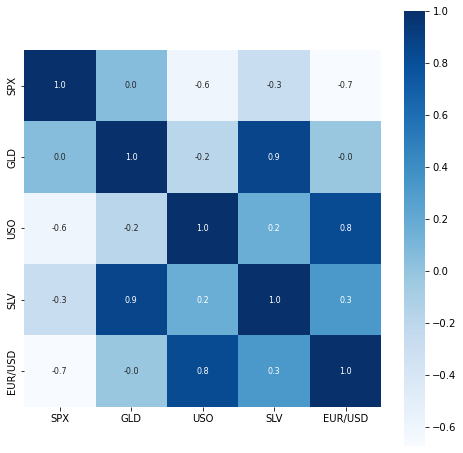

In [15]:
#Constructing heat map to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(corr_gold,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
# fmt --> Shows the no.of decimal points ; annot represents the feature names ; cmap --> color name

In [16]:
#CORRELATION VALUES OF GLD
print(corr_gold['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [17]:
# Silver is positively correlated while US oil is negatively correlated

## Distribution of GOLD price

<AxesSubplot:xlabel='GLD', ylabel='Density'>

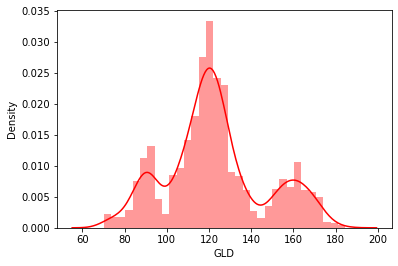

In [21]:
sns.distplot(gold_data['GLD'],color='red')

In [23]:
# INFERENCE ---> The gold price is 120 or so in most of the datasets

# SPLIT FEATURES AND TARGETS

In [24]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [25]:
X #DATE AND GLD COLUMN ARE REMOVED

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [26]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

# TRAINING AND TESTING DATA

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

# Model Training

## RANDOM FOREST ALGORITHM

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
regressor = RandomForestRegressor(n_estimators=100)

In [33]:
# TRAINING THE MODEL
regressor.fit(X_train,Y_train)

RandomForestRegressor()

### Model evaluation

In [34]:
test_data_pred = regressor.predict(X_test)

In [35]:
test_data_pred

array([168.36669852,  82.16069972, 116.20620026, 127.7047005 ,
       120.77970153, 154.63739793, 150.53179867, 126.19590042,
       117.47859891, 125.98760103, 116.76570095, 171.67820036,
       141.32609885, 167.91259881, 115.17369989, 117.9351008 ,
       139.03400332, 170.00430017, 159.54330244, 155.95689916,
       155.12810007, 125.14140006, 176.46839956, 157.64980319,
       125.4068005 ,  93.80469986,  77.44069977, 120.62520024,
       119.00009892, 167.43040053,  88.04290071, 125.24480026,
        91.21210064, 117.74880018, 121.12599885, 136.19340079,
       115.67460131, 115.4362007 , 148.60899982, 107.08620108,
       104.30190244,  87.18639774, 126.50580052, 118.13140006,
       153.41809847, 119.86049986, 108.44939985, 108.30549857,
        93.1456003 , 127.17509766,  75.2825003 , 113.62409895,
       121.11510017, 111.17709886, 119.02239913, 120.85119922,
       159.03389933, 168.5807008 , 146.99479704,  85.95879891,
        94.24680053,  86.77669888,  90.52590011, 118.92

In [36]:
# Compare with Y_test
#R sqaured error method
error_score = metrics.r2_score(Y_test, test_data_pred)
print('R squared error: ',error_score)

R squared error:  0.9885660223411352


COMPARE ACTUAL VALUES AND PREDICTED VALUES IN A PLOT

In [37]:
Y_test = list(Y_test)

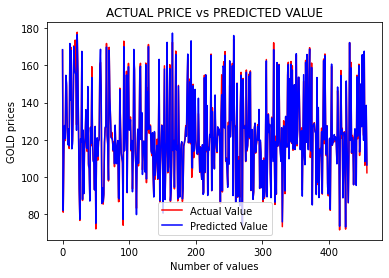

In [49]:
plt.plot(Y_test,color='red',label="Actual Value")
plt.plot(test_data_pred,color='blue',label="Predicted Value")
plt.title("ACTUAL PRICE vs PREDICTED VALUE")
plt.xlabel('Number of values')
plt.ylabel('GOLD prices')
plt.legend()
plt.show()